<h1 style="color:green">5. Feature Extraction from Audio</h1>

<h2 style="color:blue">Description</h2>

- Extracting features from audio data, The most important step in ML is extracting features from raw data.

- In this section we will see how to extract features from raw audio/speech
- 1. What is simple wave and how it look likes ?
- 2. What is complex wave and how it look likes ? 
- 3. What is audio/speech wave and how it look likes ?
- 4. Frequency domine and time domine ?
- 5. converting time domine to frequency domine (fft fast foure trasfram)
- 6. What are the methods to extract features from audio ?
- 7. Mel-Frequency Cepstral Coefficients (MFCC)

<h3>1. What is simple wave and how it look likes </h3>

- The simple wave nothig but, A sine wave or sinusoid.
- A sine wave or sinusoid is a mathematical curve that describes a smooth periodic oscillation. A sine wave is a continuous wave.
- Sine wave is a function of time (t).
- The formula of sine wave is Sine <img src=https://i.stack.imgur.com/CyoSw.png>
- A = Amplitude of Wave ω = Angular frequency, specifies how many oscillations occur in a unit time interval, in radians per second φ, the phase t.
- Here ω is the angelar frequency i.e,
<img src=https://i.stack.imgur.com/m9Psv.png>

- In this context **t** is a variable indicating time. That is, the wave wil take on a value of y(t) at the time instant t.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.io import wavfile

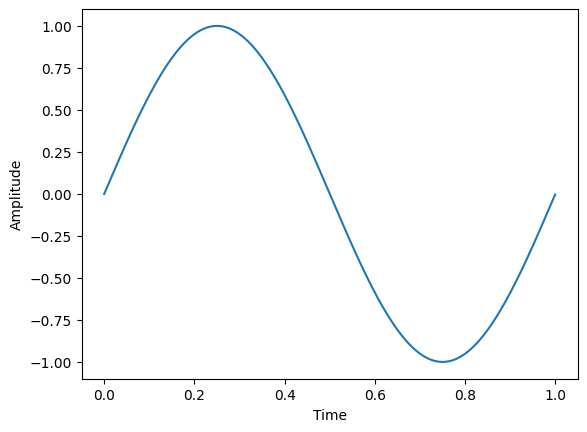

In [4]:
# simple sine wave
A = 1                      # Amplitude
f0 = 1                     # frequency
Fs = 1600                  # Sampling frequency
t = np.arange(0, 1, 1/Fs) 

X = A * np.sin(2 * np.pi * f0 * t)

plt.plot(t, X)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

<h3>2. What is complex wave and how it look likes</h3>

- A complex waveform is the result of combining the instantaneous amplitudes of two (or more) sine waves.

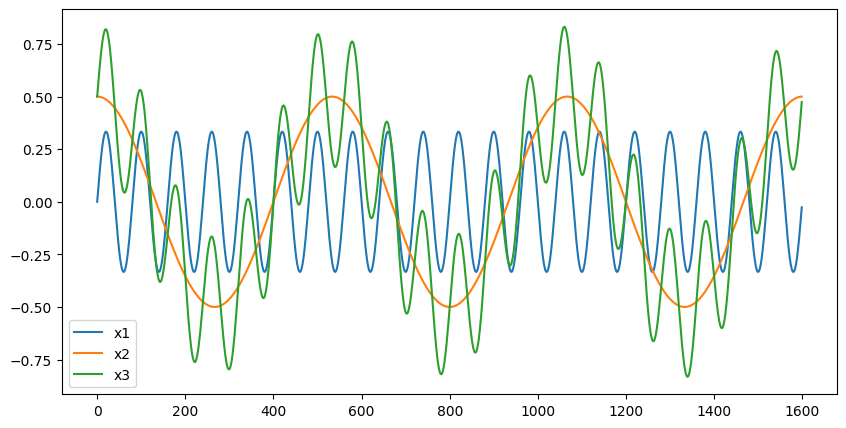

In [5]:
# create two independent waves then adding them resulting wave is complex wave.

# wave 1
A = 1/3
f0 = 20
Fs = 1600
t = np.arange(0, 1, 1/Fs)
X1 = A * np.sin(2  * np.pi * f0 * t)

# wave 2
A = 0.5
f0 = 3
Fs = 1600
t = np.arange(0, 1, 1/Fs)
X2 = A * np.cos(2  * np.pi * f0 * t)

# wave 3 = wave 1 + wave 2
X3 = X1 + X2


plt.figure(figsize=(10,5))
plt.plot(X1)
plt.plot(X2)
plt.plot(X3)
plt.legend(['x1','x2','x3'])
plt.show()

<h3>3. What is audio/speech wave and how it look likes</h3>

- For example a complex waveform is the result of combining the instantaneous amplitudes of two (or more) sine waves.
- Speech/Audio is same as complex wave it is also combination of different amplitudes of two (or more) sine waves.


In [6]:
# read speech audio file using scipy package

wav_path = "data/test/wav/1089-134686-0000.wav"
fs, data = wavfile.read(wav_path)
# fs is sampling frequency
# sampling frequency nothing but how may samples present for second.
print(f"Sampling frequency : {fs} and Wave : {data}")

FileNotFoundError: [Errno 2] No such file or directory: 'data/test/wav/1089-134686-0000.wav'

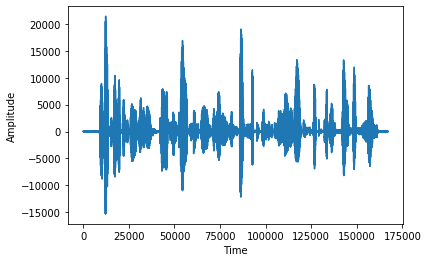

In [6]:
plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

**Obsrvation :** From the above audio/speech file we can observe that is more complex then simple sine wave. This is also combination of different sine waves with different Amplitudes.

<h3>4. Frequncy domine and time domine </h3>

<img src="images/Signal-Analysis.jpg">

- **Time Domine :** From the above figure we can observe that Time Domine nothing but ***Amplitude vs Time***
- **Frequncy Domine :** Frequncy Domine nothing but **Amplitude vs Frequncy**

- We already seen that raw audio presence in **Time Domine**
- To extract features from raw audio we need to convert raw audio form **Time Domine** to **Frequncy Domine**

<h3>5. Converting time domine to frequency domine (FFT- Fast Foure Transfram)</h3>

<img src="images/fft.gif">

- Using **FFT- Fast Foure Transfram** we convert the raw audio from Time Domine to Frequcy Domine
- To under more clearly refere below video

**Reference Video :** [But what is the Fourier Transform? A visual introduction.](https://www.youtube.com/watch?v=spUNpyF58BY&t=2s)

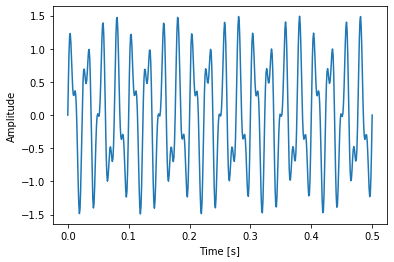

In [9]:
# https://www.ritchievink.com/blog/2017/04/23/understanding-the-fourier-transform-by-example/

# Example
# From complex wave convert Time Domine to Frequency Domine using FFT


t = np.linspace(0, 0.5, 500)
s = np.sin(40 * 2 * np.pi * t) + 0.5 * np.sin(90 * 2 * np.pi * t)

plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)
plt.show()

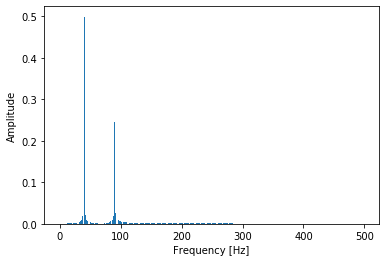

In [10]:
fft = np.fft.fft(s)
T = t[1] - t[0]  # sampling interval 
N = s.size

# 1/T = frequency
f = np.linspace(0, 1 / T, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1.5)  # 1 / N is a normalization factor
plt.show()

<h3>6. What are the methodes to extract features from audio?</h3>

- Speech signal represented as a sequence of spectral vectors
- Using FFT we extract *spectrums* from each speech signal

<img src="images/spectrum_1.png" height="60%" width="60%">

- 1. Extract signels from speech
- 2. Using FFT convert each signel to spectrum


<img src="images/spectrum_2.png" height="60%" width="60%">

- 3. It is in frequency domine

<img src="images/spectrum_3.png" height="60%" width="60%">

- 4. Then Rotate it by 90 degrees

<img src="images/spectrum_4.png" height="60%" width="60%">

- 5. We get MAP spectral amplitude to a gray level (0-255) value. 0 represents black and 255 represents white.
- 6. Higher the amplitude, darker the corresponding region.

<img src="images/spectrum_5.png" height="60%" width="60%">

- 7. Time Vs Frequency representation of a speech signal is referred to as **spectrogram**.





<h3>7. Mel-Frequency Cepstral
Coefficients (MFCC)</h3>

- Spectrum --> Mel-Filters --> Mel-Spectrum

<h4>7.1 Mel-Frequency Analysis</h4>

- Mal-Frequency analysis of speech is based on human perception experiments
- It is observed that human ear acts as filter
- It concentrates on only certain frequency components
- Those filters are non-uniformly spaced on the frequency axis
- More filters in the low frequency regins
- Less no. of filters in high frequency regions

<img src="images/mel_ff.png" height="60%" width="70%">

- We can observe that More no. of filters in low frequency region, and Lesser no. of filters in high frequency region
- Using Mel-Filters convert Spectrum to Mel-Spectrum

<h4>7.2 Cepstral Coefficients</h4>

- Say log X[K] = log (Mel-Specturm)
- Now perform Cepstral analysis on log X[k]
    - log X[k] = log H[k] + log E[k]
    - Taking IFFT
    - X[k] = H[k] + E[k]
- Cepstral coefficients h[k] obtaned for Mel-Spectrum are refered to as Mel-Frequency Cepstral Coefficients often denoted by **MFCC**

<img src="images/mfcc_2.png" height="60%" width="60%">

<img src="images/mfcc_3.png" height="60%" width="60%">

**Reference :**

- 1. [MFCC features vector](https://www.youtube.com/watch?v=KzevshgDv8g)
- 2. [Mel Frequency Cepstral Coefficients](https://www.youtube.com/watch?v=E9LGj9s9sbw&t=982s)

## Example

In [7]:
import librosa
import librosa.display

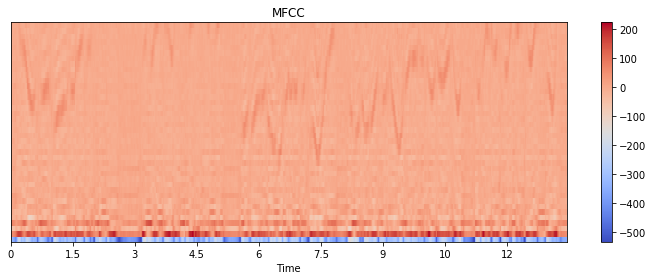

In [9]:
y, sr = librosa.load("images/1859-145701-0003.wav")
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()